In [2]:
! python -m pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.9 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.0 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.9 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- -------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matpotlib

ERROR: Could not find a version that satisfies the requirement matpotlib (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matpotlib


In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
df = pd.read_excel(r"C:\Users\91885\Downloads\penguins_size.xlsx")

In [16]:
#view shape of dataset
print(df.shape)

(344, 7)


In [18]:
#view first 10 rows 
print(df.head(10))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   
7  Adelie  Torgersen              39.2             19.6              195.0   
8  Adelie  Torgersen              34.1             18.1              193.0   
9  Adelie  Torgersen              42.0             20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  

In [19]:
#view description dataset 
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [22]:
#find missing values in respective with columns
#we will use .null to find the missing values 
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [25]:
#dropping columns with null values 
print(df.dropna(inplace=True))

None


In [26]:
#checking again if all null value have been removed or not 
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [27]:
#show datatypes of column
print(df.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [29]:
#change column 'flipper' and 'body mass' to integar data type
df['flipper_length_mm'] = df['flipper_length_mm'].astype(int)
df['body_mass_g'] = df['body_mass_g'].astype(int)


In [30]:
#again check our changes
print(df.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object


In [31]:
#checking values in dataframe 
print(df)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7                181   
1    Adelie  Torgersen              39.5             17.4                186   
2    Adelie  Torgersen              40.3             18.0                195   
4    Adelie  Torgersen              36.7             19.3                193   
5    Adelie  Torgersen              39.3             20.6                190   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7                214   
340  Gentoo     Biscoe              46.8             14.3                215   
341  Gentoo     Biscoe              50.4             15.7                222   
342  Gentoo     Biscoe              45.2             14.8                212   
343  Gentoo     Biscoe              49.9             16.1                213   

     body_mass_g     sex  
0           

In [37]:
import pandas as pd

def calculate_correlation(df):
    """
    Calculates the Pearson correlation matrix for a Pandas DataFrame,
    handling potential data type issues.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The correlation matrix, or None if an error occurs.
    """
    try:
        # 1. Select only numeric columns
        numeric_df = df.select_dtypes(include=['number'])

        # 2. Check if there are any numeric columns left
        if numeric_df.empty:
            print("Error: DataFrame contains no numeric columns.")
            return None

        # 3. Calculate the correlation matrix
        correlation_matrix = numeric_df.corr(method='pearson')
        return correlation_matrix

    except ValueError as e:
        print(f"ValueError during correlation calculation: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
correlation_result = calculate_correlation(df)

if correlation_result is not None:
    print(correlation_result)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228640           0.652126   
culmen_depth_mm           -0.228640         1.000000          -0.578730   
flipper_length_mm          0.652126        -0.578730           1.000000   
body_mass_g                0.589066        -0.472987           0.873211   

                   body_mass_g  
culmen_length_mm      0.589066  
culmen_depth_mm      -0.472987  
flipper_length_mm     0.873211  
body_mass_g           1.000000  


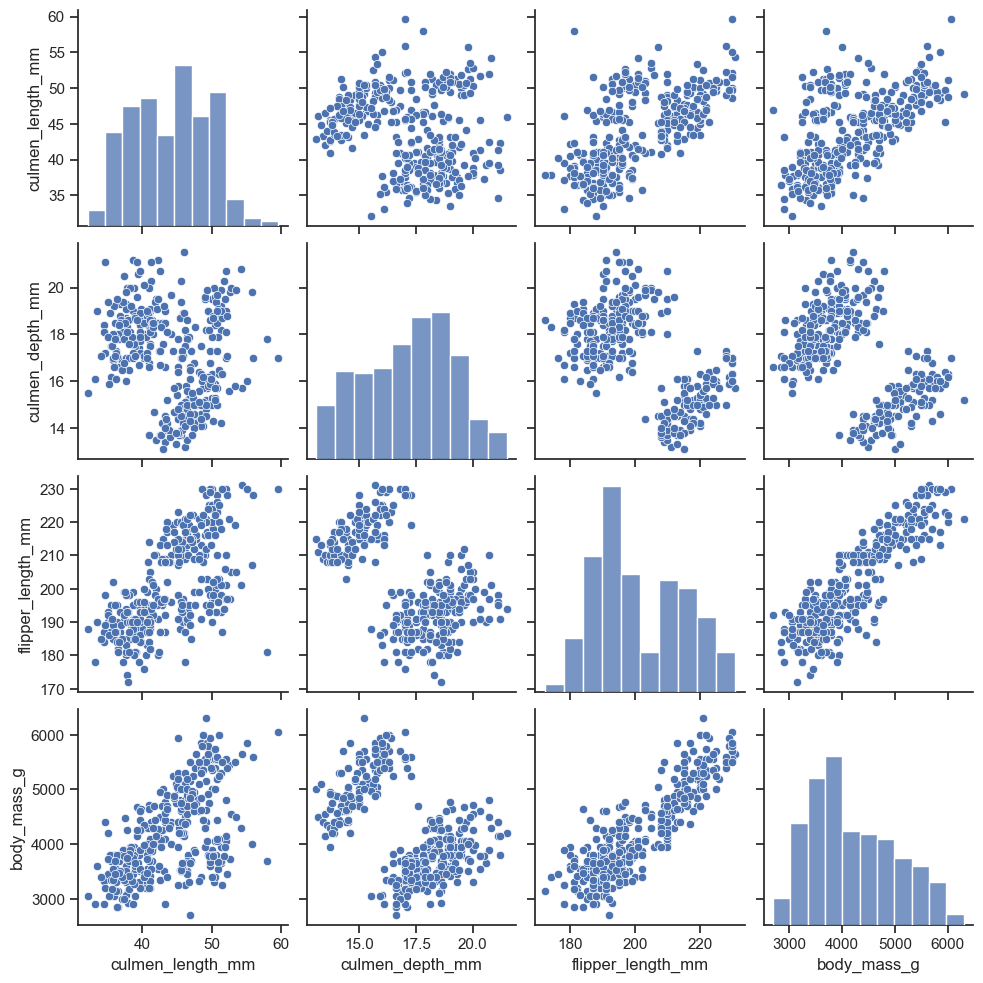

In [38]:
#scatter plot visualization
sns.set(style='ticks')
sns.pairplot(df,kind='scatter', diag_kind = 'hist')
plt.show()

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228640           0.652126   
culmen_depth_mm           -0.228640         1.000000          -0.578730   
flipper_length_mm          0.652126        -0.578730           1.000000   
body_mass_g                0.589066        -0.472987           0.873211   

                   body_mass_g  
culmen_length_mm      0.589066  
culmen_depth_mm      -0.472987  
flipper_length_mm     0.873211  
body_mass_g           1.000000  


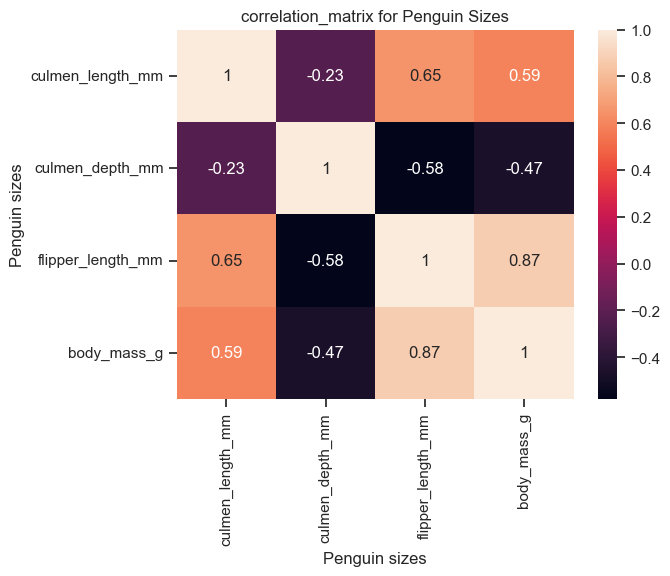

In [47]:
#visualization of correlation matrix
import pandas as pd

def calculate_correlation(df):
    """
    Calculates the Pearson correlation matrix for a Pandas DataFrame,
    handling potential data type issues.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The correlation matrix, or None if an error occurs.
    """
    try:
        # 1. Select only numeric columns
        numeric_df = df.select_dtypes(include=['number'])

        # 2. Check if there are any numeric columns left
        if numeric_df.empty:
            print("Error: DataFrame contains no numeric columns.")
            return None

        # 3. Calculate the correlation matrix
        correlation_matrix = numeric_df.corr(method='pearson')
        return correlation_matrix

    except ValueError as e:
        print(f"ValueError during correlation calculation: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
correlation_result = calculate_correlation(df)

if correlation_result is not None:
    print(correlation_result)
sns.heatmap(correlation_result, annot = True)
plt.title("correlation_matrix for Penguin Sizes")
plt.xlabel("Penguin sizes")
plt.ylabel("Penguin sizes")
plt.show()

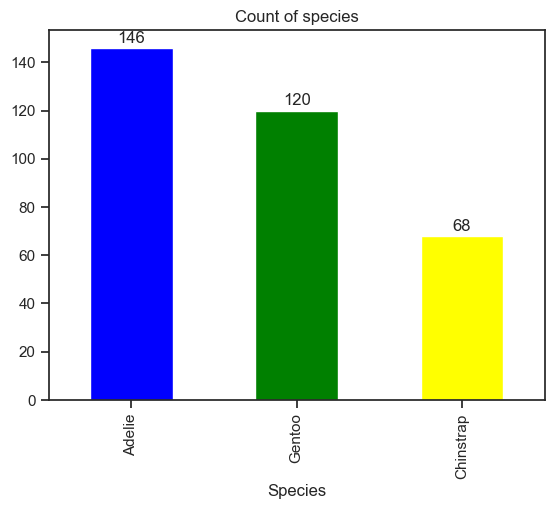

In [51]:
#count of species
df['species'].value_counts().plot(kind = 'bar',color=["blue","green","yellow"])
plt.title("Count of species")
plt.xlabel('Species')
#add values 
counts = df['species'].value_counts()
for i, count in enumerate(counts):
    plt.text(i,count+1,str(count),ha='center',va='bottom')
    plt.show

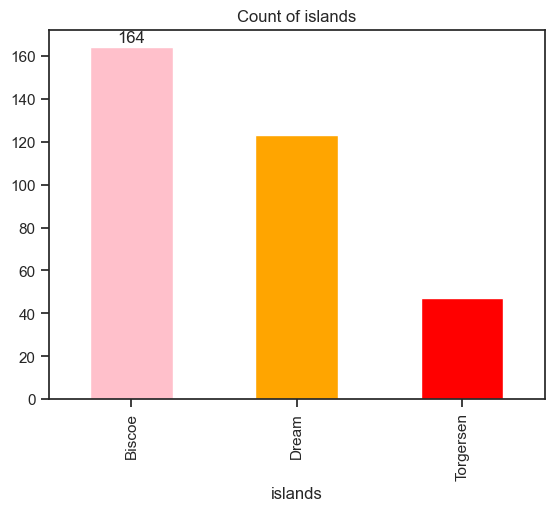

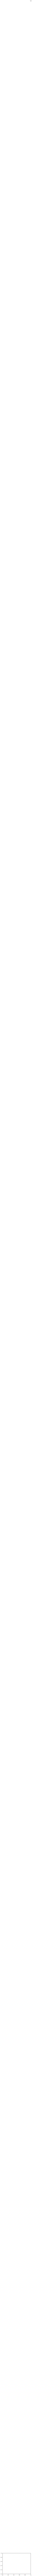

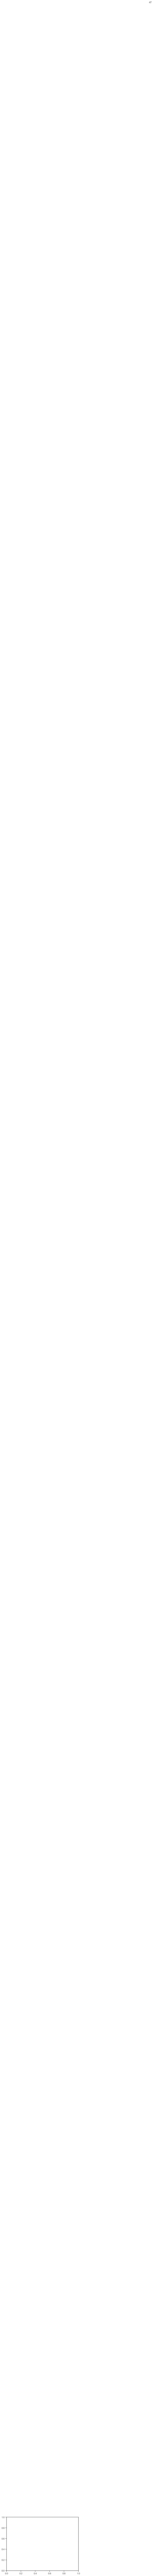

In [57]:
#island count 
df['island'].value_counts().plot(kind='bar',color=['pink','orange','red'])
plt.title('Count of islands')
plt.xlabel('islands')
#data labels
island_counts = df['island'].value_counts()
for i, count in enumerate(island_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')  
    plt.show()